## Modulos

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

----------------------------------------------

## Cargando dataset

In [2]:
df = pd.read_csv('diabetes_transform.txt', sep='|')

In [3]:
print(df.shape)

(442, 13)


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_group,bmi_group
0,59.0,Female,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,Adulto,Obesidad_leve
1,48.0,Male,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,Adulto,Peso_normal
2,72.0,Female,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,Anciano,Obesidad_leve
3,24.0,Male,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,Joven,Sobrepeso
4,50.0,Male,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,Adulto,Peso_normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        442 non-null    float64
 1   sex        442 non-null    object 
 2   bmi        442 non-null    float64
 3   bp         442 non-null    float64
 4   s1         442 non-null    float64
 5   s2         442 non-null    float64
 6   s3         442 non-null    float64
 7   s4         442 non-null    float64
 8   s5         442 non-null    float64
 9   s6         442 non-null    float64
 10  target     442 non-null    float64
 11  age_group  442 non-null    object 
 12  bmi_group  442 non-null    object 
dtypes: float64(10), object(3)
memory usage: 45.0+ KB


----------------------------------------------

## Estandarizando

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'age_group', 'bmi_group'],
      dtype='object')

In [8]:
numeric_vars = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
scaler = StandardScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_group,bmi_group
0,0.800500,Female,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719,Adulto,Obesidad_leve
1,-0.039567,Male,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659,Adulto,Peso_normal
2,1.793307,Female,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580,Anciano,Obesidad_leve
3,-1.872441,Male,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513,Joven,Sobrepeso
4,0.113172,Male,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496,Adulto,Peso_normal


-------------------------------

## ACP

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[numeric_vars])

In [24]:
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

In [25]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_group,bmi_group,PC1,PC2
0,0.800500,Female,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719,Adulto,Obesidad_leve,0.432318,-1.631132
1,-0.039567,Male,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659,Adulto,Peso_normal,-2.919048,1.167703
2,1.793307,Female,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580,Anciano,Obesidad_leve,0.058510,-1.205301
3,-1.872441,Male,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513,Joven,Sobrepeso,0.428449,0.058395
4,0.113172,Male,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496,Adulto,Peso_normal,-0.667367,0.614267


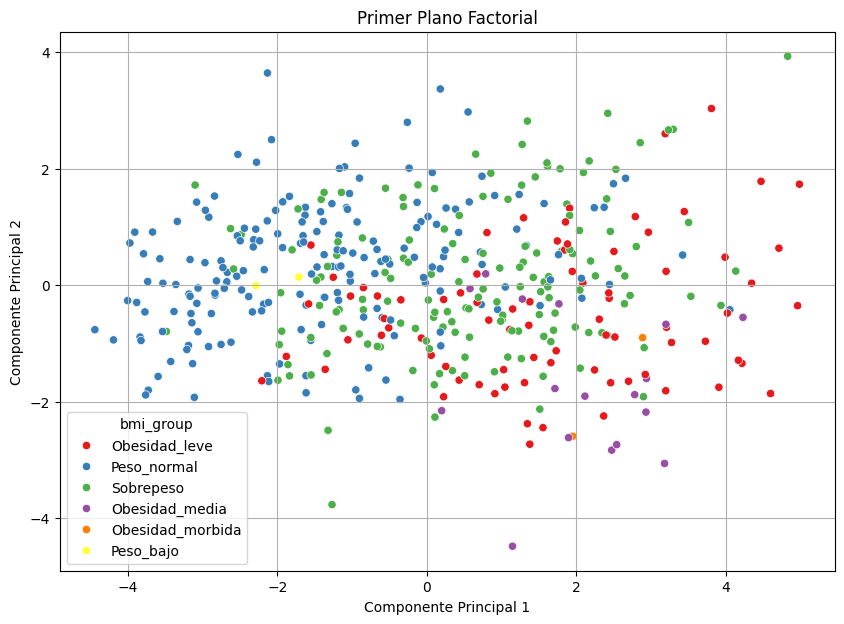

In [29]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='bmi_group', data=df, palette='Set1')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Primer Plano Factorial')
plt.grid(True)
plt.show()

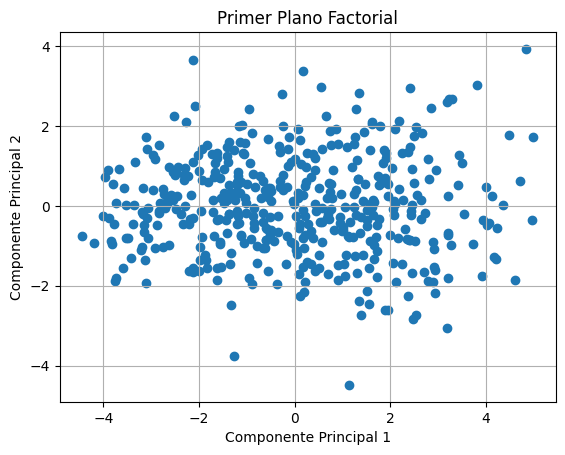

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Primer Plano Factorial')
plt.grid(True)
plt.show()

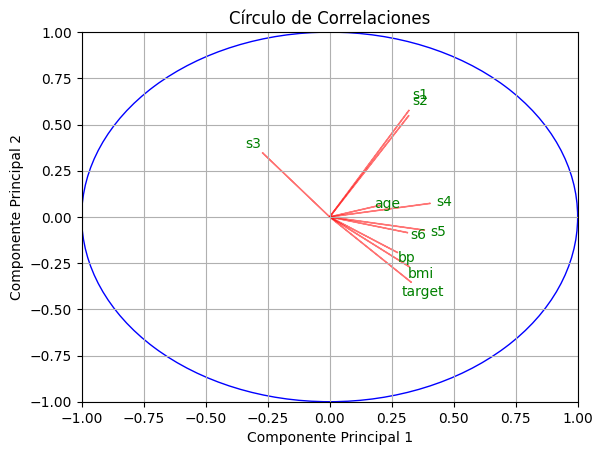

In [16]:
for i in range(len(numeric_vars)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15,
             numeric_vars[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Círculo de Correlaciones')
plt.grid(True)

circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_artist(circle)

plt.show()